 # Домашнее задание 1. Линейные модели

### Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация ноутбука

Загрузка необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Задача регресссии (9 баллов)

Постройте модель машинного обучения, решающую задачу регресии на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 1.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки pandas

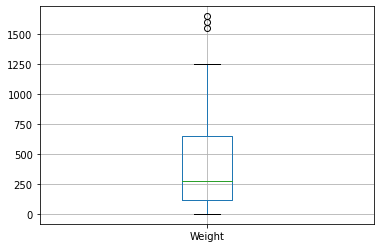

In [63]:
data = pd.read_csv("Fish.csv")

# Построим boxplot для численных признаков
boxplot_weight = data.boxplot(column=['Weight'])


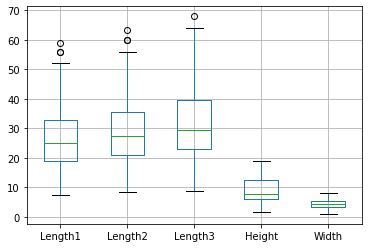

In [64]:
boxplot_ = data.boxplot(column=['Length1', 'Length2', 'Length3', 'Height', 'Width'])

## 1.2 График совместного распределения признаков


Постройте график совместного распределения количественных признаков при помощи функции pairplot библиотеки seaborn

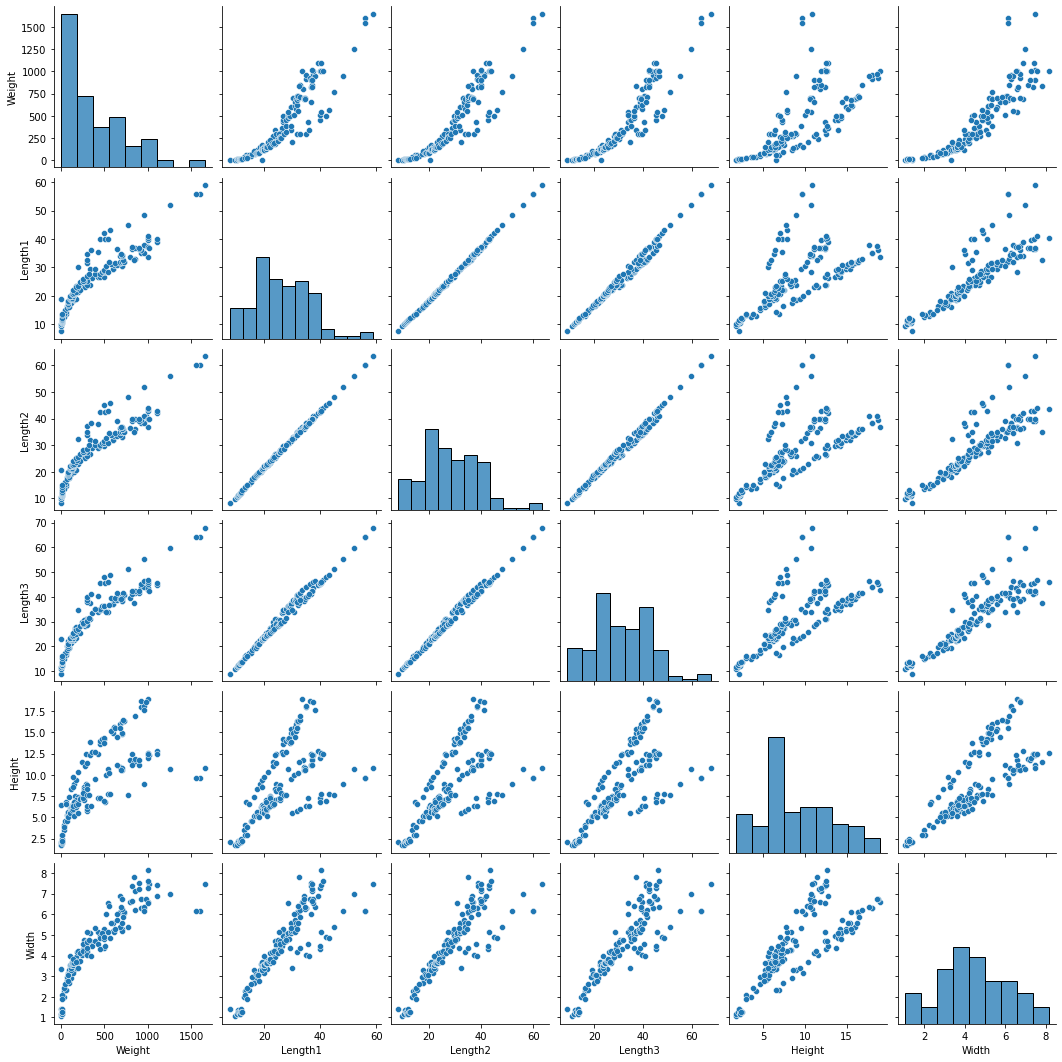

In [65]:
sns.pairplot(data)

# 1.2.1 OneHotEncoder

In [66]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe_ftrs = ohe.fit_transform(data['Species'].values.reshape(-1,1))
tmp = pd.DataFrame(ohe_ftrs, columns = ['dummy' + str(i) for i in range(ohe_ftrs.shape[1])])

data = pd.concat([data, tmp], axis=1)
print(len(data))


159


## Исключение выбросов.
### Возьмем данные в пределах 95 квантиля.

In [67]:
from copy import copy

# Находим 95 квантиль и исключаем все что выше
quantile = data.quantile(q=0.95)
items = quantile.items()
prepared_data = data
for name, quantile_value in items:
    
    # Проверяем, что это не дополнительный стобец из OneHotEncoder
    if 'dummy' in name:
        continue
    prepared_data = prepared_data[prepared_data[name] <= quantile_value]

    
data_for_task_3 = copy(prepared_data)
print(len(prepared_data))
print(len(data))



135
159


## 1.3 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый в соотношении 80%/20% при помощи функции train_test_split библиотеки sklearn.model_selection. При необходимости категориальные признаки в числовые (например, при помощи функции get_dummies библиотеки pandas).

In [68]:
from sklearn.model_selection import train_test_split
import torch


def get_X_Y(data, tensor_flag = False):
    X = data.drop('Weight', axis=1)
    X = X.drop('Species', axis=1)
    
    Y = data['Weight']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
    if tensor_flag:
        X_train = torch.tensor(X_train.values, dtype=torch.float)
        Y_train = torch.tensor(Y_train.values, dtype=torch.float)
        Y_train = Y_train.reshape(len(Y_train), 1)

        X_test = torch.tensor(X_test.values, dtype=torch.float)
        Y_test = torch.tensor(Y_test.values, dtype=torch.float)
        Y_test = Y_test.reshape(len(Y_test), 1)
        
        
    return X_train, X_test, Y_train, Y_test

## 1.4 OLS regression

Обучить модель линейной регрессии методом наименьших квадратов (ordinary least squares linear regression), импортировав класс `LinearRegression` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE. Посмотрите, как влияет исключение из набора данных выбросов (экстремальных значений, например, больше 95 квантиля) на оценку ошибки. 



In [69]:
# В data исключены выбросы


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()

rms_sum = 0
score = 0


print("Без выбросов")
loop_length = 10
for i in range(loop_length):
    X_train, X_test, Y_train, Y_test = get_X_Y(data)
    regressor.fit(X_train, Y_train)


    Y_predicted = regressor.predict(X_test)

    rms = mean_squared_error(Y_test, Y_predicted, squared=True)
    
    rms_sum += rms
    score += regressor.score(X_test, Y_test)

print(f"Средняя метрика RMSE за {loop_length} выборок -", rms_sum / loop_length)

Без выбросов
Средняя метрика RMSE за 10 выборок - 9349.378745316151


In [70]:
# В prepared_data исключены выбросы и все выше 95 квантиля

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()

rms_sum = 0
score = 0


loop_length = 1000
for i in range(loop_length):
    X_train, X_test, Y_train, Y_test = get_X_Y(prepared_data)
    regressor.fit(X_train, Y_train)


    Y_predicted = regressor.predict(X_test)

    rms = mean_squared_error(Y_test, Y_predicted, squared=True)
    
    rms_sum += rms
    score += regressor.score(X_test, Y_test)
    
print(f"Средняя метрика RMSE за {loop_length} выборок -", rms_sum / loop_length)

Средняя метрика RMSE за 1000 выборок - 5055.727434457176


## 1.5 Ridge regression

Обучить модель линейной регрессии с $L_2$-регуляризацией (Гребневая регрессия, Ridge regression), импортировав класс `Ridge` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE


In [71]:
# В prepared_data исключены выбросы и все выше 95 квантиля

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

regressor = Ridge()

rms_sum = 0
score = 0


loop_length = 1000
for i in range(loop_length):
    X_train, X_test, Y_train, Y_test = get_X_Y(prepared_data)
    regressor.fit(X_train, Y_train)


    Y_predicted = regressor.predict(X_test)

    rms = mean_squared_error(Y_test, Y_predicted, squared=False)
    
    rms_sum += rms
    score += regressor.score(X_test, Y_test)
    
print(f"Средняя метрика RMSE за {loop_length} выборок -", rms_sum / loop_length)
print(f"Средняя метрика score за {loop_length} выборок -", rms_sum / loop_length)

Средняя метрика RMSE за 1000 выборок - 68.36431175241397
Средняя метрика score за 1000 выборок - 68.36431175241397


## 1.6 Lasso regression

Обучить модель линейной регрессии с $L_1$-регуляризацией (Lasso regression), импортировав класс `Lasso` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE

In [72]:
# В prepared_data исключены выбросы и все выше 95 квантиля

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

regressor = Ridge()

rms_sum = 0
score = 0


loop_length = 1000
for i in range(loop_length):
    X_train, X_test, Y_train, Y_test = get_X_Y(prepared_data)
    regressor.fit(X_train, Y_train)


    Y_predicted = regressor.predict(X_test)

    rms = mean_squared_error(Y_test, Y_predicted, squared=False)
    
    rms_sum += rms
    score += regressor.score(X_test, Y_test)
    
print(f"Средняя метрика RMSE за {loop_length} выборок -", rms_sum / loop_length)

Средняя метрика RMSE за 1000 выборок - 67.66992636468716


## 1.7 Оптимизация Ridge regression

Сделайте перебор в цикле гиперпараметра `alpha` для модели `Ridge` от 0 до 1 с шагом 0.05. Постройте график ошибки RMSE на тестовых данных в зависимости от гиперпараметра `alpha`

/home/kirill/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.41766e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


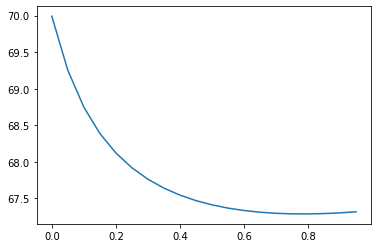

In [80]:
# В prepared_data исключены выбросы и все выше 95 квантиля

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


rms_sum = 0
score = 0

alpha_array = []
rms_array = []

X_train, X_test, Y_train, Y_test = get_X_Y(prepared_data)

for alpha in np.arange(0, 1, 0.05):
    rms_sum = 0
    regressor = Ridge(alpha=alpha)
    regressor.fit(X_train, Y_train)



    Y_predicted = regressor.predict(X_test)
    rms = mean_squared_error(Y_test, Y_predicted, squared=False)
    rms_array.append(rms)
    alpha_array.append(alpha)

plt.plot(alpha_array, rms_array)

## 1.8 Вывод

Сравните качество (величину ошибки) для моделей из пп. 1.4-1.7. Какая модель показала наилучший результат?

Ваш ответ: Lasso regression показал наилучший рещультат, но очень близкий с остальными.

# 2. Задача классификации (9 баллов)

Постройте модель машинного обучения, решающую задачу классификации на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 2.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки `pandas`

In [81]:
data = pd.read_csv("spam.csv", encoding='latin-1')

data.describe()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [82]:
# Удаляем лишние столбцы
data.pop('Unnamed: 2')
data.pop('Unnamed: 3')
data.pop('Unnamed: 4')

data.describe()


,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [83]:
def get_verdict(some_str):
    if some_str == 'ham':
        return 0
    return 1

# Создадим новый столбец verdict либо 0, либо 1 (1 - спам)
data['verdict'] = [get_verdict(line) for line in data['v1']]


data_for_task_4 = copy(data)

In [84]:
data.tail()

,v1,v2,verdict
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


## 2.2 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый при помощи функции `train_test_split` библиотеки ???

In [85]:
from sklearn.model_selection import train_test_split

# Получение train_test_split.
def get_X_Y_2(data, tensor_flag = False):
    X = data['v2']
    Y = data['verdict']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
    
    # Перевод в тензоры для pytorch
    if tensor_flag:
        Y_train = torch.tensor(Y_train.values, dtype=torch.float)
        Y_train = Y_train.reshape(len(Y_train), 1)

        Y_test = torch.tensor(Y_test.values, dtype=torch.float)
        Y_test = Y_test.reshape(len(Y_test), 1)
    
        
    return X_train, X_test, Y_train, Y_test

## 2.3 Предобработка данных

Проведите необходимую предобработку (перенормировку, выделение главных компонент и т.д.) данных. Приведите данные к такому виду, чтобы их можно было использовать для обучения моделей.

In [86]:
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

cv = CountVectorizer()
cv.fit(data['v2'])

len(cv.vocabulary_)



8672

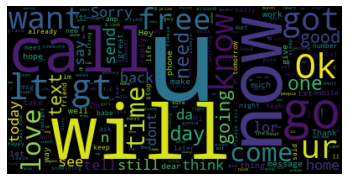

In [87]:
# Распредедение слов

from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(data['v2']))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2.4 Логистическая регрессия
Обучите модель логистической регрессии, используя стандартную реализацию sklearn.linear_model.LogisticRegression. Оцените метрики качества полученной модели при помощи sklearn.metrics.classification_report и sklearn.metrics.f1_score.

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_test, Y_train, Y_test = get_X_Y_2(data)

# Преобразование выборки
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

# Обученние модели
logit = LogisticRegression()
logit.fit(X_train, Y_train)


Y_pred = logit.predict(X_test)

# Baseline: sklearn.metrics.f1_score(average='macro') = 0.95
score = f1_score(Y_test, Y_pred, average='macro')
print(f'f1_score - {score}')


# round(logit.score(X_train, Y_train), 3), round(logit.score(X_test, Y_test), 3),

f1_score - 0.9491076726459445


## 2.5 Подбор гиперпараметра регуляризации

При помощи sklearn.model_selection.GridSearchCV переберите оптимальные параметры C в диапазоне 0.01 до 1 с шагом 0.1.

In [92]:
from sklearn.model_selection import GridSearchCV

my_range = np.arange(0.01, 5, 0.1)

parametrs = { 
    'C': my_range
}


logit = LogisticRegression()
grid = GridSearchCV(logit, parametrs)
grid.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)


print(grid.best_params_)

score = f1_score(Y_test, Y_pred, average='macro')
print(f'f1_score - {score}')

{'C': 4.71}
f1_score - 0.9533486999254492


### Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

## 2.6 Выводы

Сравните качество (величину ошибки) для моделей из пп. 2.4-2.5. Какая модель показала наилучший результат?

Ваш ответ: Модель по факту одна и та же, просто различаются параметры C. При С < 0.8 ошибка больше, при C ~ 1 ошибка незначильно отличается. Лучший результат был при C ~ 20.

# 3. Самописная линейная регрессиия (3 балла)

Релизовать алгоритм построения модели линейной регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

class SGDLinearRegression:
    def __init__(self, epsilon = 0.00007):
        self.bias = None
        self.model = None
        self.epsilon = epsilon


    def fit(self, X, y, iterations=10000):
        print(f"Текущий параметр epsilon - {self.epsilon}")
        model = nn.Linear(X.shape[1], 1)
        self.model = model
        optimizer = optim.SGD(model.parameters(), lr=self.epsilon)
        
        loss_fn = nn.MSELoss()
        for i in range(iterations):
            optimizer.zero_grad()
            predictions = model(X)
            loss = loss_fn(predictions, y)
    
            loss.backward()
            optimizer.step()
        print(f"error = {loss}\n")
    
    def predict(self, X):
        return self.model(X)
    
    # Метод нужен для работы GridSearchCV
    def get_params(self,deep=True):
        return {"epsilon" : self.epsilon}
    
    # Метод нужен для работы GridSearchCV
    def score(self, X, y_true):
        y_pred = self.predict(X)
        u = ((y_true - y_pred)**2).sum()
        v = ((y_true - y_true.mean())**2).sum()
        return (1 - (u/v)).item()
    
    # Метод нужен для работы GridSearchCV
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self



3.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

Текущий параметр epsilon - 1e-05
error = 20725.1328125

Текущий параметр epsilon - 1e-05
error = 20696.85546875

Текущий параметр epsilon - 1e-05
error = 16431.357421875

Текущий параметр epsilon - 1e-05
error = 17224.484375

Текущий параметр epsilon - 1e-05
error = 20303.04296875

Текущий параметр epsilon - 1.3598938172877051e-05
error = 20219.3828125

Текущий параметр epsilon - 1.3598938172877051e-05
error = 20152.337890625

Текущий параметр epsilon - 1.3598938172877051e-05
error = 16088.4912109375

Текущий параметр epsilon - 1.3598938172877051e-05
error = 16835.068359375

Текущий параметр epsilon - 1.3598938172877051e-05
error = 19770.296875

Текущий параметр epsilon - 1.8493111942973226e-05
error = 19719.5703125

Текущий параметр epsilon - 1.8493111942973226e-05
error = 19575.79296875

Текущий параметр epsilon - 1.8493111942973226e-05
error = 15712.734375

Текущий параметр epsilon - 1.8493111942973226e-05
error = 16431.6171875

Текущий параметр epsilon - 1.8493111942973226e-05
erro

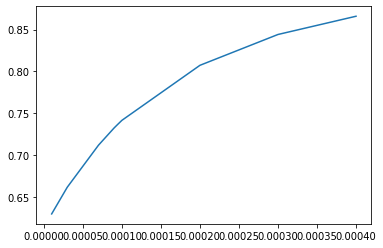

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = dict()

# При больших epsilon (больше 0.0004) функция ошибки уходит в бескоенчость
# Предполагаю, что проскакиваю локальный минимум и еще сильнее раскачиваюсь.
# Поэтому взял другой отрезок epsilon
param_grid['epsilon'] = np.geomspace(0.00001, 0.0004, num=13)


model = SGDLinearRegression()
grid = GridSearchCV(model, param_grid)

X_train, X_test, Y_train, Y_test = get_X_Y(prepared_data, tensor_flag=True)

grid.fit(X_train, Y_train)

print('Лучшие параметры - ', end='')
print(grid.best_params_)
print('\n')


error_dict = {}

# При больших epsilon (больше 0.0004) функция ошибки уходит в бескоенчость
# Предполагаю, что проскакиваю локальный минимум и еще сильнее раскачиваюсь.
# Поэтому взял другой отрезок epsilon
eps_list = [0.00001, 0.00003, 0.00007, 0.00009, 0.000095, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
for epsilon in eps_list:
    model = SGDLinearRegression(epsilon=epsilon)
    model.fit(X_train, Y_train)
    error_dict[epsilon] = model.score(X_test, Y_test)
    
plt.plot(eps_list, error_dict.values())
    

3.3 Обучите модель на основе класса sklearn.linear_model.SGDRegressor с параметрами `alpha=0`. Сравните качество с вашими моделями из пункта 3.2.

In [147]:
from sklearn.linear_model import SGDRegressor

X_train, X_test, Y_train, Y_test = get_X_Y(data_for_task_3, tensor_flag=False)


model = SGDRegressor()
model.fit(X_train, Y_train)

y_test_pr = model.predict(X_test)

print('Root Mean Squared Error:', mean_squared_error(Y_test, y_test_pr))

Root Mean Squared Error: 4.266912689609734e+24


Ваш вывод (2-3 предложения):

In [ ]:
Научились разными способами реализовывать линейную регрессию, подробно разобрали как обучается модель
и какие параметры на это влияют. SGDRegressor не получилось обучить.

# 4. Самописная логистическая регрессиия (4 балла)

Релизовать алгоритм построения модели логистической регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

class SGDLogisticRegression:

    def __init__(self, epsilon = 0.1):
        self.bias = None
        self.model = None
        self.epsilon = epsilon
        self.sigmoid = nn.Sigmoid()

    def fit(self, X, y, iterations=500):
        print(f"Текущий параметр epsilon - {self.epsilon}")
        model = nn.Linear(X.shape[1], 1)
        self.model = model
        optimizer = optim.SGD(model.parameters(), lr=self.epsilon)
        m = nn.Sigmoid()
        loss_fn = torch.nn.BCELoss()
        for i in range(iterations):
            optimizer.zero_grad()
            predictions = model(X)
            loss = loss_fn(self.sigmoid(predictions), y)
    
            loss.backward()
            optimizer.step()
        print(f"BCE error после обучения {loss}\n")
    
    def predict(self, X):
        m = nn.Sigmoid()
        pred_sig = self.sigmoid(self.model(X))
        
        predic = list()
        for i in range(len(pred_sig)):
            if pred_sig[i][0] > 0.5:
                predic.append(1)
            else: 
                predic.append(0)
        return predic
    
    # Метод нужен для работы GridSearchCV
    def get_params(self,deep=True):
        return {"epsilon" : self.epsilon}
    
    # Метод нужен для работы GridSearchCV
    def score(self, X, y_true, sample_weight=None):
        y_pred=self.predict(X)
        intersection=0.
        for i,j in zip(y_true, y_pred):
            if i==j:
                intersection+=1
        return intersection/(len(y_true)+len(y_pred)-intersection) 
    
    # Метод нужен для работы GridSearchCV
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self



4.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

## Обработка данных

In [53]:
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

# from scipy import toarray

cv = CountVectorizer()
cv.fit(data_for_task_4['v2'])

len(cv.vocabulary_)

def get_X_tensor(X_train, X_test):
    X_train = cv.transform(X_train)
    X_test = cv.transform(X_test)
    
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    X_train = torch.tensor(X_train, dtype=torch.float)
    X_test = torch.tensor(X_test, dtype=torch.float)
    return X_train, X_test
    

Текущий параметр epsilon - 0.001
BCE error после обучения 0.6697095632553101

Текущий параметр epsilon - 0.005
BCE error после обучения 0.5990617871284485

Текущий параметр epsilon - 0.01
BCE error после обучения 0.5381107330322266

Текущий параметр epsilon - 0.05
BCE error после обучения 0.36948978900909424

Текущий параметр epsilon - 0.1
BCE error после обучения 0.2968144118785858

Текущий параметр epsilon - 0.2
BCE error после обучения 0.22349032759666443

Текущий параметр epsilon - 0.3
BCE error после обучения 0.18542815744876862

Текущий параметр epsilon - 0.4
BCE error после обучения 0.16195307672023773

Текущий параметр epsilon - 0.5
BCE error после обучения 0.1457371860742569

Текущий параметр epsilon - 0.8
BCE error после обучения 0.11690771579742432

Текущий параметр epsilon - 1
BCE error после обучения 0.10542687028646469



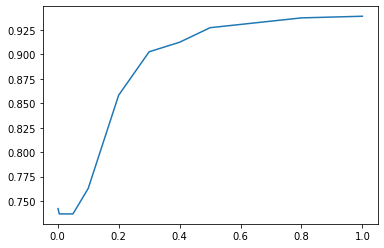

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = dict()


param_grid['epsilon'] = np.geomspace(0.0001, 1, num=13)


model = SGDLogisticRegression()
grid = GridSearchCV(model, param_grid)

X_train, X_test, Y_train, Y_test = get_X_Y_2(data_for_task_4, tensor_flag=True)

X_train, X_test = get_X_tensor(X_train, X_test)

grid.fit(X_train, Y_train)

print('Лучшие параметры - ', end='')
print(grid.best_params_)
print('\n')


error_dict = {}

# Взял другой отрезок epsilon, чтобы было нагляднее
eps_list = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1]
for epsilon in eps_list:
    model = SGDLogisticRegression(epsilon=epsilon)
    model.fit(X_train, Y_train)
    error_dict[epsilon] = model.score(X_test, Y_test)
    
plt.plot(eps_list, error_dict.values())

 4.3 Обучите модель на основе класса sklearn.linear_model.SGDClassifier с параметрами `loss='log'`. Сравните качество с вашими моделями из пункта 4.2.

In [124]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = get_X_Y_2(data_for_task_4, tensor_flag=False)

cv = CountVectorizer()
cv.fit(data_for_task_4['v2'])

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

X_train = X_train.toarray()
X_test = X_test.toarray()


clf = SGDClassifier(loss="log").fit(X_train, Y_train)
y_test_pr = clf.predict(X_test)

print('accuracy_score:', accuracy_score(Y_test, y_test_pr))

accuracy_score: 0.9865470852017937


Ваш вывод (2-3 предложения):

In [ ]:
Научились разными способами реализовывать бинарную классификацию, подробно разобрали как обучается модель
и какие параметры на это влияют.